In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

sns.set(style = "whitegrid")

df = pd.read_csv('car details v4.csv')
df.head()



,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
count,2.059000e+03,2059.000000,2.059000e+03,1995.000000,1995.000000,1995.000000,1995.000000,1946.000000
mean,1.702992e+06,2016.425449,5.422471e+04,4280.860652,1767.991980,1591.735338,5.306266,52.002210
std,2.419881e+06,3.363564,5.736172e+04,442.458507,135.265825,136.073956,0.822170,15.110198
min,4.900000e+04,1988.000000,0.000000e+00,3099.000000,1475.000000,1165.000000,2.000000,15.000000
25%,4.849990e+05,2014.000000,2.900000e+04,3985.000000,1695.000000,1485.000000,5.000000,41.250000
50%,8.250000e+05,2017.000000,5.000000e+04,4370.000000,1770.000000,1545.000000,5.000000,50.000000
75%,1.925000e+06,2019.000000,7.200000e+04,4629.000000,1831.500000,1675.000000,5.000000,60.000000
max,3.500000e+07,2022.000000,2.000000e+06,5569.000000,2220.000000,1995.000000,8.000000,105.000000


In [5]:
df.isnull().sum()

Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
dtype: int64

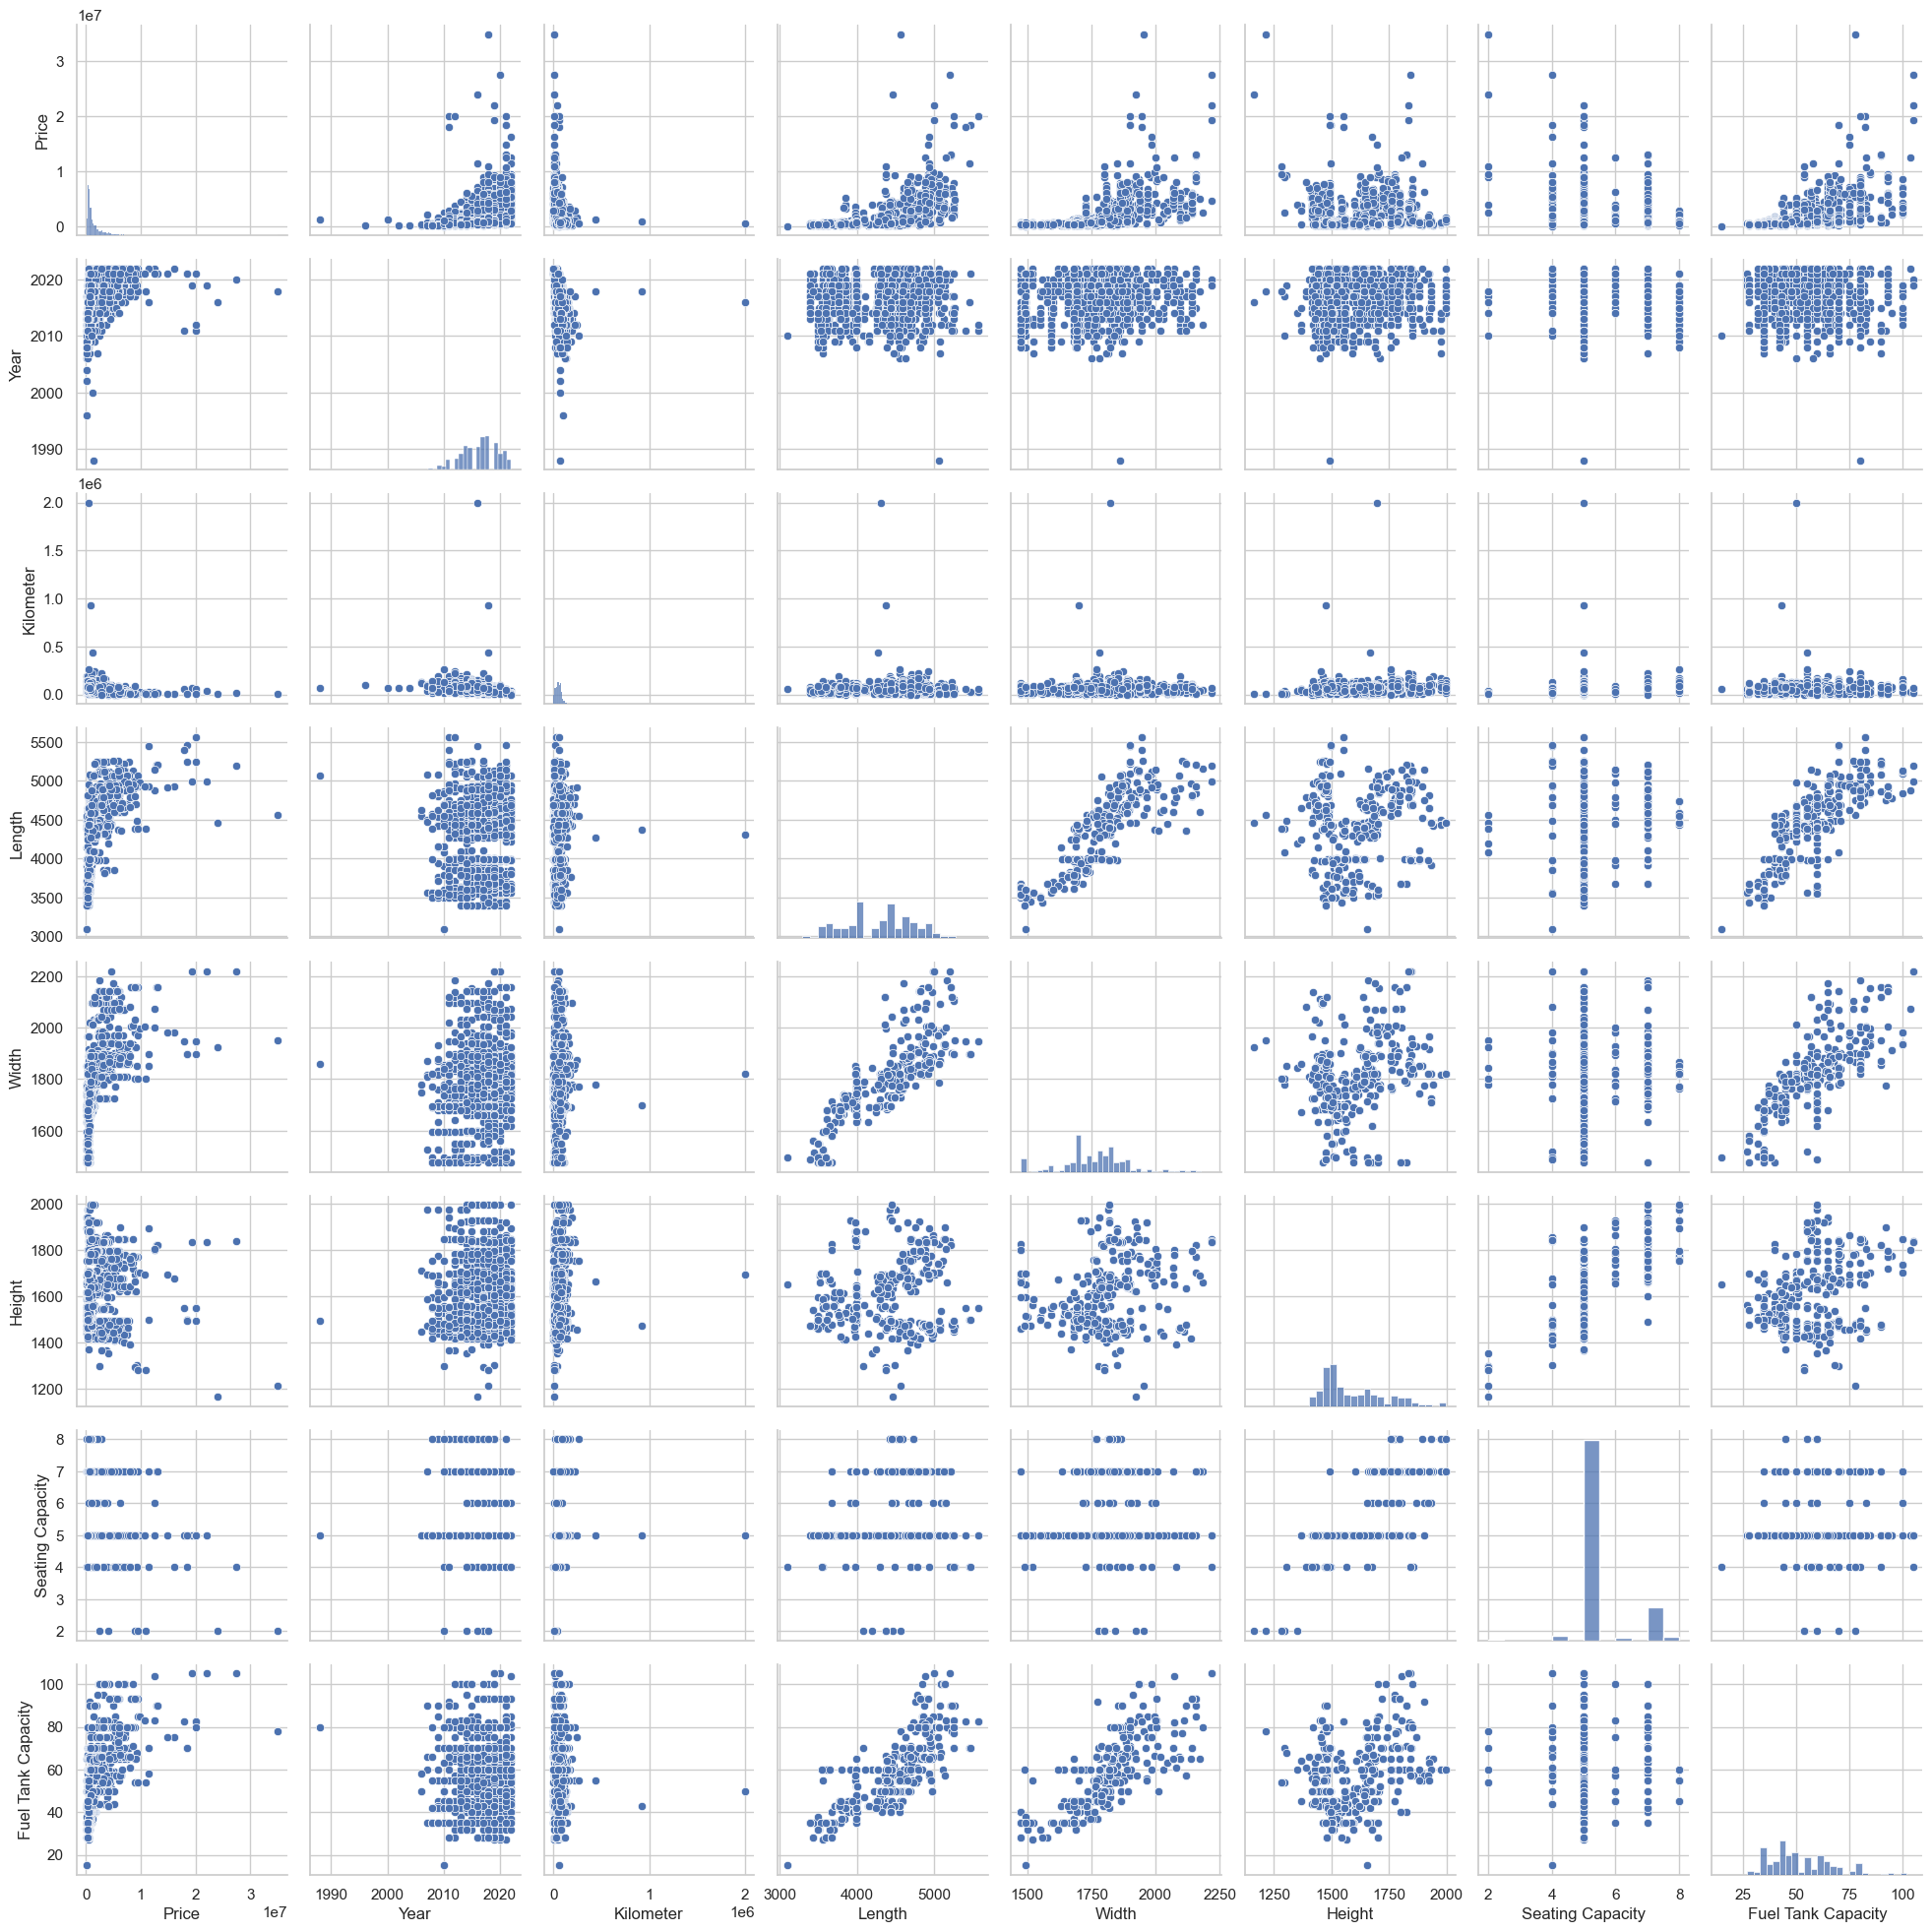

In [6]:
sns.pairplot(df.select_dtypes(include=['int64', 'float64']))
plt.show() 

In [14]:
print(df.columns)

Index(['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type',
       'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine',
       'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height',
       'Seating Capacity', 'Fuel Tank Capacity'],
      dtype='object')


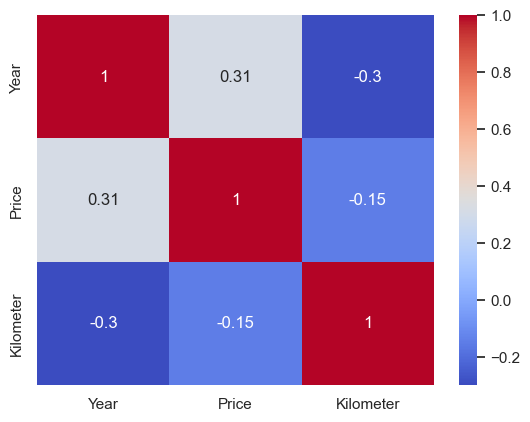

In [144]:

selected_cols = ['Year', 'Price', 'Kilometer']
sns.heatmap(df[selected_cols].corr(), annot=True, cmap='coolwarm')

sample_df = df.sample(frac=0.2, random_state=42)


In [146]:
df = pd.read_csv("car details v4.csv")
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

In [148]:
df = df.drop(['model', 'max_torque', 'max_power'], axis=1)

In [150]:
df['engine'] = df['engine'].str.replace(' cc', '', regex=False).astype(float)

In [152]:
print("Valores nulos:\n", df.isnull().sum())

Valores nulos:
 make                    0
price                   0
year                    0
kilometer               0
fuel_type               0
transmission            0
location                0
color                   0
owner                   0
seller_type             0
engine                 80
drivetrain            136
length                 64
width                  64
height                 64
seating_capacity       64
fuel_tank_capacity    113
dtype: int64


In [154]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

In [156]:
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

In [158]:
df = pd.get_dummies(df, drop_first=True)

In [162]:
cols_median = ['engine', 'length', 'width', 'height', 'seating_capacity', 'fuel_tank_capacity']
df[cols_median] = df[cols_median].fillna(df[cols_median].median())

In [164]:
print("Vnulos", df.isnull().sum().sum())

Vnulos 0


In [140]:
df_encoded = pd.get_dummies(df, drop_first=True)

X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']

model = RandomForestRegressor(random_state=40)
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns)

importances_sorted = importances.sort_values(ascending=False)

top_features = importances_sorted.head(10)



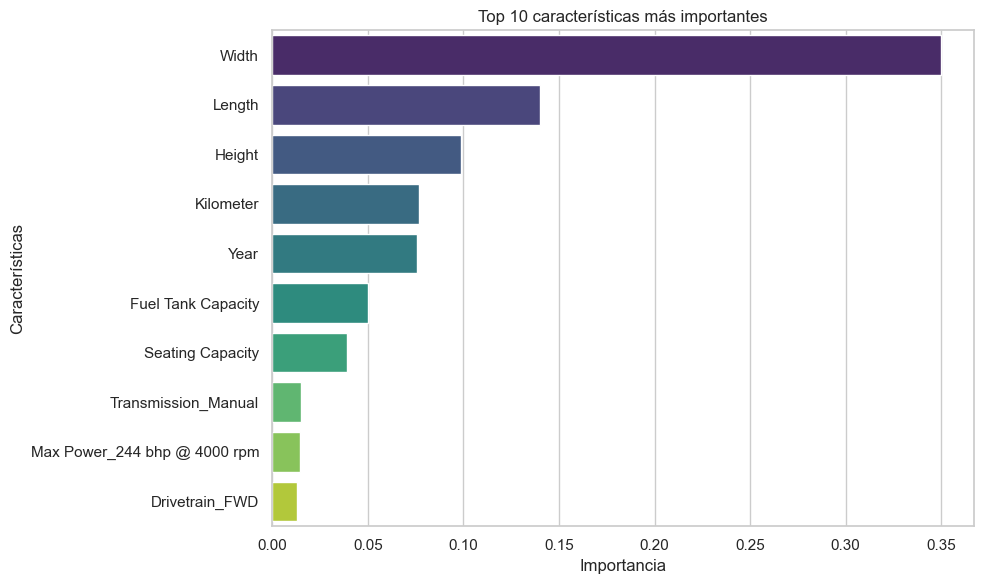

In [138]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index, hue=top_features.index, palette='viridis', legend=False)
plt.title("Top 10 características más importantes")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.tight_layout()
plt.show()

In [136]:
datos = pd.concat([X, y], axis=1)


datos = datos.dropna()


X = datos.drop('Price', axis=1)
y = datos['Price']

In [134]:
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [132]:
df['Engine'] = df['Engine'].astype(str)
df['Engine'] = df['Engine'].str.replace('cc', '', regex=False).str.strip()
df['Engine'] = pd.to_numeric(df['Engine'], errors='coerce')

df = df.dropna(subset=['Engine'])

X = df[['Year', 'Kilometer', 'Engine', 'Fuel Tank Capacity', 'Seating Capacity']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [130]:
modelo_lr = LinearRegression()
modelo_lr.fit(X_train, y_train)

LinearRegression()

In [128]:
print("Coeficientes:", modelo_lr.coef_)
print("Intercepto:", modelo_lr.intercept_)

Coeficientes: [ 2.25260685e+05 -2.98970452e+00  2.05728177e+03  3.89119407e+04
 -8.70091029e+05]
Intercepto: -453238812.8390055


In [126]:
y_pred = modelo_lr.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [169]:
print("Evaluación del modelo:")
print(f"R²: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

Evaluación del modelo:
R²: 0.5995
MAE: 858663.28
MSE: 1559854394322.50
RMSE: 1248941.31
